In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime


C:\Users\jalla\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


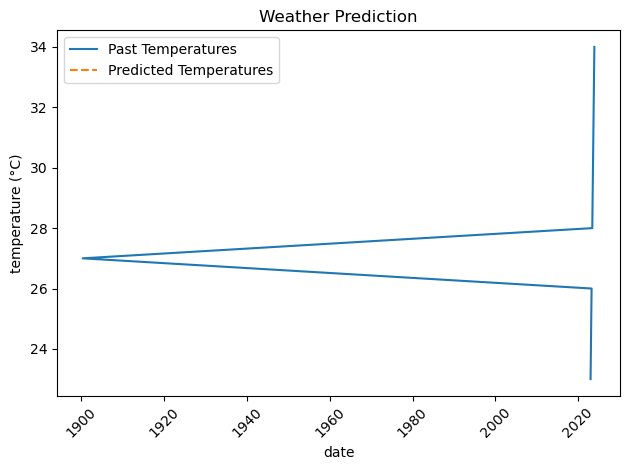

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import numpy as np

# Load CSV
df = pd.read_csv("C:\\jyothi\\weather.csv")

# Clean invalid or missing dates
df = df[df['date'].notnull()]

# Convert to datetime, invalid formats will become NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with NaT after conversion (optional)
df = df.dropna(subset=['date'])

# Continue processing
df['dateOrdinal'] = df['date'].map(datetime.toordinal)



# Prepare data
X = df[['dateOrdinal']]
y = df['temperature']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict next 5 days
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=5)
future_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1,1)
predicted = model.predict(future_ordinal)

# Plot
plt.plot(df['date'], y, label='Past Temperatures')
plt.plot(future_dates, predicted, label='Predicted Temperatures', linestyle='--')
plt.xlabel("date")
plt.ylabel("temperature (°C)")
plt.title("Weather Prediction")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()